In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [83]:
data = pd.read_csv("./abusingDetectionTrainDataset.csv", header = 0)
df = data.copy()
df.head()

data.head()
print(data.shape)
data.iloc[7:16]


(104399, 44)


,newID,char_jobcode,char_level,logging_timestamp,charStatA,charStatB,charStatC,charStatD,charStatE,charStatF,...,actionSessionAmountH,actionSessionAmountI,actionSessionAmountJ,actionSessionAmountK,actionSessionAmountL,actionSessionAmountM,actionSessionAmountN,tradeSessionAmountD,tradeSessionAmountE,blocked
7,0,0,91,2017-6-27 9:22:16.77320,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,91,2017-6-27 9:52:18.360531,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,100,2017-6-27 10:22:21.844578,0,35,0,0,12,0,...,1,0,0,1,7,0,8,0,0,0
10,6,0,19,2017-6-23 6:35:35.759989,0,0,0,0,0,0,...,0,0,0,0,31,0,16,0,0,0
11,6,0,40,2017-6-23 7:5:38.346240,0,5,0,0,2,0,...,0,3,2,0,297,0,297,1,0,0
12,6,0,52,2017-6-23 7:35:42.54159,0,5,0,0,2,0,...,0,3,0,2,992,0,1111,0,0,0
13,6,0,79,2017-6-24 9:56:3.679898,0,5,0,0,2,0,...,1,5,0,61,2451,0,1411,0,0,0
14,6,0,94,2017-6-24 10:26:4.970009,0,5,0,0,2,0,...,0,3,0,0,819,0,1038,0,0,0
15,6,0,100,2017-6-25 4:37:30.580665,0,33,0,0,2,0,...,0,6,2,13,558,0,678,1,0,0


In [58]:
max_df = df.groupby("newID", as_index = False).max()
max_df = df.groupby("newID", as_index = False).min()
max_df.shape

(10441, 44)

In [63]:
print("no. of NA: ", df.isna().sum().sum())


no. of NA:  0


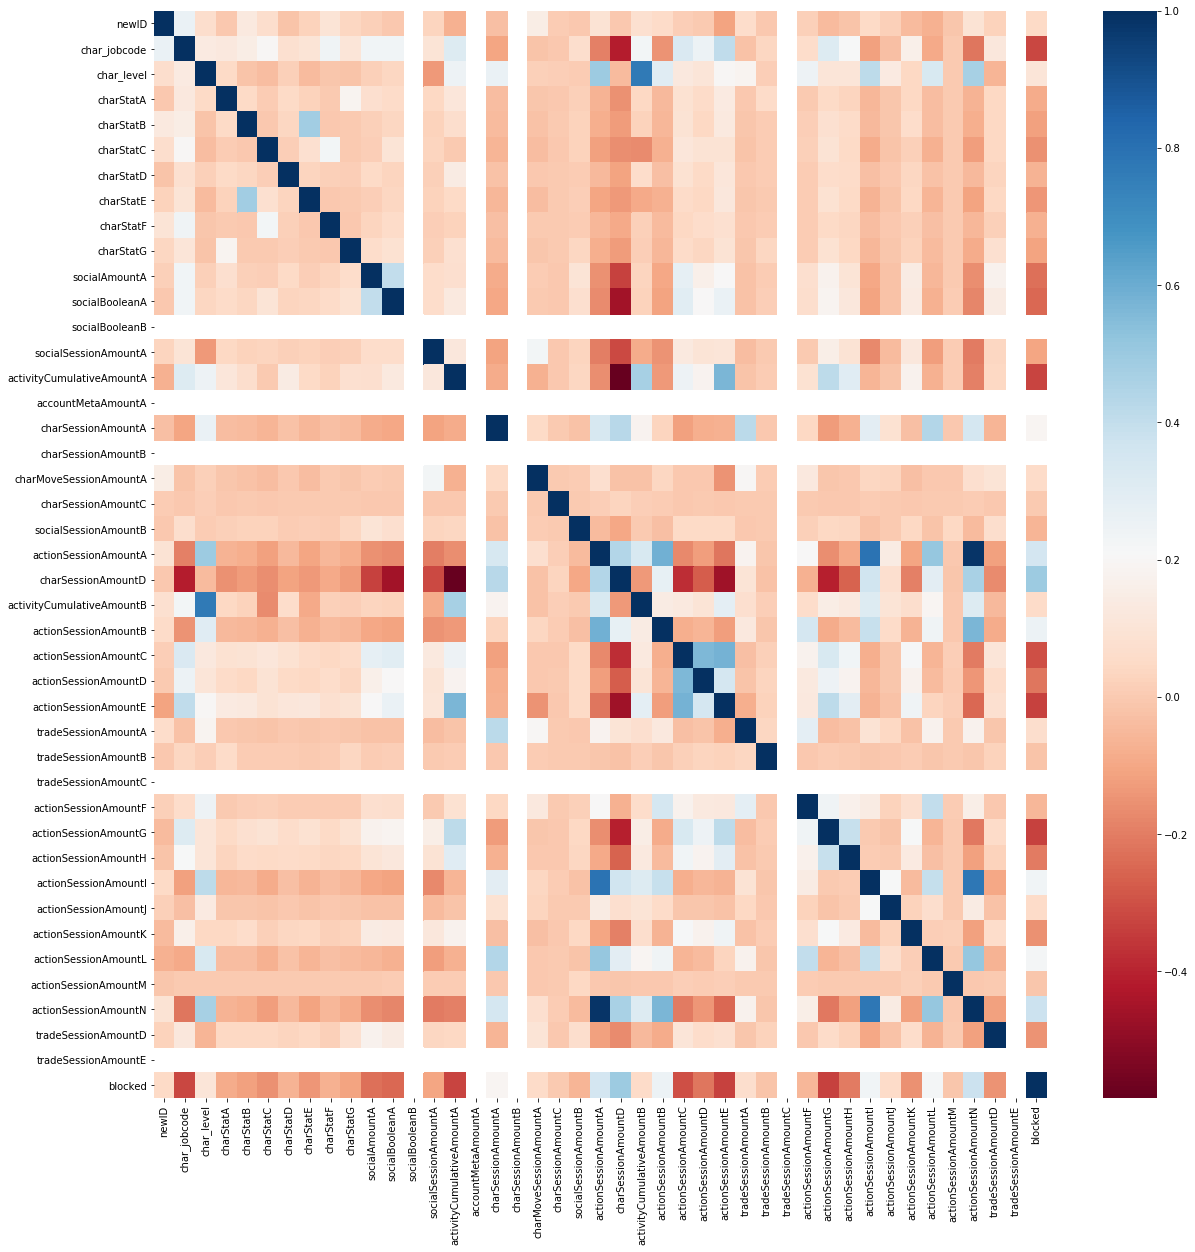

In [59]:
plt.figure(figsize = (20,20))
corr = df.corr()
sns.heatmap(corr, cmap = "RdBu")



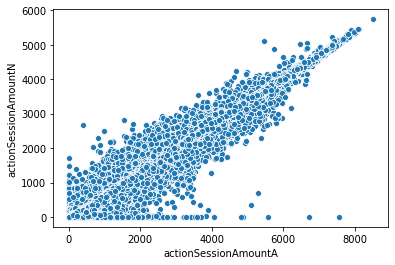

In [61]:
sns.scatterplot(data = df, x = df.actionSessionAmountA, y = df.actionSessionAmountN)

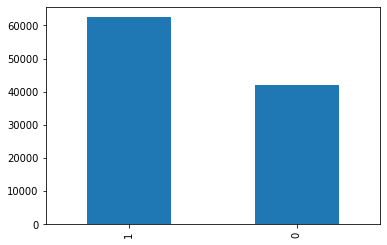

1: blocked users 
0: non-blocked users
ratio of blocked users: 0.5983


In [47]:
df["blocked"].value_counts().plot(kind = "bar")
plt.show()

print("1: blocked users \n0: non-blocked users")
df["blocked"].value_counts()
print("ratio of blocked users: {0:.4f}".format(df["blocked"].value_counts()[1]/len(df)))

In [65]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104399 entries, 0 to 104398
Data columns (total 44 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   newID                      104399 non-null  int64 
 1   char_jobcode               104399 non-null  int64 
 2   char_level                 104399 non-null  int64 
 3   logging_timestamp          104399 non-null  object
 4   charStatA                  104399 non-null  int64 
 5   charStatB                  104399 non-null  int64 
 6   charStatC                  104399 non-null  int64 
 7   charStatD                  104399 non-null  int64 
 8   charStatE                  104399 non-null  int64 
 9   charStatF                  104399 non-null  int64 
 10  charStatG                  104399 non-null  int64 
 11  socialAmountA              104399 non-null  int64 
 12  socialBooleanA             104399 non-null  int64 
 13  socialBooleanB             104399 non-null  

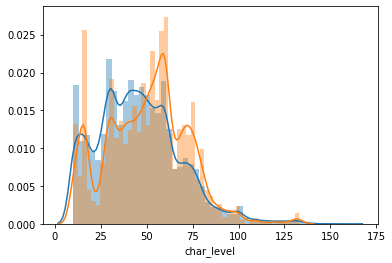

In [72]:
sns.distplot(df[df["blocked"] == 0]["char_level"])
sns.distplot(df[df["blocked"] == 1]["char_level"])

In [77]:
def to_timestamp(log_str):
    return pd.Timestamp(log_str)

df["time"] = df["logging_timestamp"].apply(to_timestamp)
df.drop("logging_timestamp", axis = 1 , inplace = True)
max_df = df.groupby("newID", as_index = False).max()
min_df = df.groupby("newID", as_index = False).min()

time_X = max_df[["time"]] - min_df[["time"]]
time_X["cumulative_time"] = time_X["time"].apply(lambda x: x.total_seconds()/3600)
time_X.drop("time", axis = 1, inplace = True)


In [84]:
time_X

,cumulative_time
0,25.388228
1,116.993171
2,22.715062
3,4.507341
4,116.044507
...,...
10436,11.428294
10437,6.413898
10438,118.872980
10439,96.646638


In [95]:
data["char_jobcode"].value_counts()

30     40799
31     18309
29     17329
21      2957
32      1105
       ...  
148        5
157        4
152        3
141        2
156        2
Name: char_jobcode, Length: 165, dtype: int64

In [93]:
l = list(l)


[40799,
 18309,
 17329,
 2957,
 1105,
 1096,
 895,
 734,
 646,
 615,
 538,
 487,
 464,
 438,
 413,
 405,
 380,
 374,
 364,
 351,
 351,
 337,
 332,
 330,
 328,
 308,
 291,
 272,
 272,
 268,
 256,
 246,
 244,
 243,
 242,
 239,
 237,
 234,
 232,
 228,
 222,
 218,
 216,
 214,
 209,
 203,
 203,
 199,
 191,
 184,
 177,
 176,
 173,
 166,
 166,
 162,
 158,
 158,
 157,
 155,
 154,
 154,
 151,
 146,
 142,
 136,
 134,
 134,
 133,
 130,
 130,
 129,
 129,
 129,
 126,
 123,
 118,
 118,
 117,
 114,
 111,
 110,
 105,
 105,
 105,
 104,
 101,
 100,
 100,
 100,
 99,
 99,
 96,
 96,
 94,
 93,
 91,
 90,
 87,
 83,
 81,
 79,
 75,
 75,
 75,
 73,
 71,
 66,
 62,
 61,
 59,
 52,
 49,
 49,
 49,
 46,
 46,
 42,
 41,
 38,
 37,
 36,
 34,
 34,
 31,
 31,
 25,
 24,
 23,
 23,
 23,
 22,
 21,
 21,
 20,
 19,
 18,
 18,
 18,
 17,
 15,
 15,
 15,
 13,
 12,
 12,
 11,
 11,
 11,
 10,
 9,
 7,
 7,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 3,
 2,
 2]

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
df = sns.load_dataset("mpg")

In [5]:
df["acceleration"] >11

0       True
1       True
2      False
3       True
4      False
       ...  
393     True
394     True
395     True
396     True
397     True
Name: acceleration, Length: 398, dtype: bool

In [6]:
if df["acceleration"] > 11:
    df["bbb"] = "over11"

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [8]:
df["bbb"] = df["acceleration"] > 11


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,bbb
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,True
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,True
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,False
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,True
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,False
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,True
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,True
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,True
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,True


In [27]:
df.loc[df["acceleration"] > 11, "name"] = "name"
    

In [28]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,name
1,15.0,8,350.0,165.0,3693,11.5,70,usa,name
2,18.0,8,318.0,150.0,3436,11.0,70,usa,name
3,16.0,8,304.0,150.0,3433,12.0,70,usa,name
4,17.0,8,302.0,140.0,3449,10.5,70,usa,name
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,name
394,44.0,4,97.0,52.0,2130,24.6,82,europe,name
395,32.0,4,135.0,84.0,2295,11.6,82,usa,name
396,28.0,4,120.0,79.0,2625,18.6,82,usa,name
